In [ ]:
# Load the dataset to check the number of rows and columns
import pandas as pd
data = pd.read_csv('/content/data_file.csv')

# Get the number of rows and columns
rows, columns = data.shape

rows, columns


(62485, 18)

#**Preprocessing**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/data_file.csv')  # Adjust the path if needed

# Drop unnecessary columns (FileName, md5Hash)
data_cleaned = df.drop(columns=['FileName', 'md5Hash'])

# Define features (X) and target (y)
X = data_cleaned.drop(columns=['Benign'])
y = data_cleaned['Benign']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the preprocessed training data
X_train_scaled[:5], y_train[:5]


(array([[-4.82992716e-01, -4.46798676e-03, -2.34343697e-03,
         -5.27136389e-02, -5.37395421e-01, -1.84891864e-02,
         -1.40427262e-02,  1.90216257e-03, -5.22743017e-01,
          3.20252128e-01,  1.15987975e-01,  2.71800347e-01,
         -8.24106271e-01, -1.05662995e-02, -1.36549226e-01],
        [-4.82992716e-01, -4.47186273e-03,  8.74140204e-02,
         -5.27136389e-02, -5.37395421e-01, -2.26529317e-02,
         -1.40492895e-02, -1.23797679e-01,  4.15461527e+00,
         -3.90164423e-01, -8.16017637e-01,  2.71800347e-01,
          1.33834768e+00, -1.05450251e-02, -1.36549226e-01],
        [-4.82992716e-01, -4.47186273e-03, -3.90531110e-02,
         -5.27136389e-02, -5.37395421e-01, -2.26529317e-02,
         -1.40492895e-02, -1.23797679e-01,  1.29911629e-01,
         -3.90164423e-01, -8.16017637e-01,  2.71800347e-01,
          1.33834768e+00, -1.05340780e-02, -1.36549226e-01],
        [ 2.06532365e+00, -4.47186273e-03, -7.98535406e-02,
         -5.27136389e-02,  2.18742792

#**Feature Extraction**

In [ ]:
!pip install pefile


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/data_file.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# Feature extraction function
def feature_extraction(data):
    # Selecting relevant features for ransomware detection
    features = data[['Machine', 'DebugSize', 'NumberOfSections',
                     'SizeOfStackReserve', 'ResourceSize',
                     'BitcoinAddresses']]

    # Add derived features
    features['SizeToSectionRatio'] = features['SizeOfStackReserve'] / (features['NumberOfSections'] + 1)

    # Include the target column ('Benign') for machine learning tasks
    labels = data['Benign']

    return features, labels

# Extract features and labels from the dataset
features, labels = feature_extraction(data)

# Display the extracted features and labels
print("Extracted Features:")
print(features.head())

print("\nLabels:")
print(labels.head())


Extracted Features:
   Machine  DebugSize  NumberOfSections  SizeOfStackReserve  ResourceSize  \
0      332          0                 3             1048576           672   
1    34404         84                 8              262144          1024   
2      332          0                 3             1048576           672   
3    34404         84                 6              262144          1040   
4    34404         84                 7              262144          1096   

   BitcoinAddresses  SizeToSectionRatio  
0                 0       262144.000000  
1                 0        29127.111111  
2                 0       262144.000000  
3                 0        37449.142857  
4                 0        32768.000000  

Labels:
0    1
1    1
2    1
3    1
4    1
Name: Benign, dtype: int64


<ipython-input-5-c935c92346db>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['SizeToSectionRatio'] = features['SizeOfStackReserve'] / (features['NumberOfSections'] + 1)


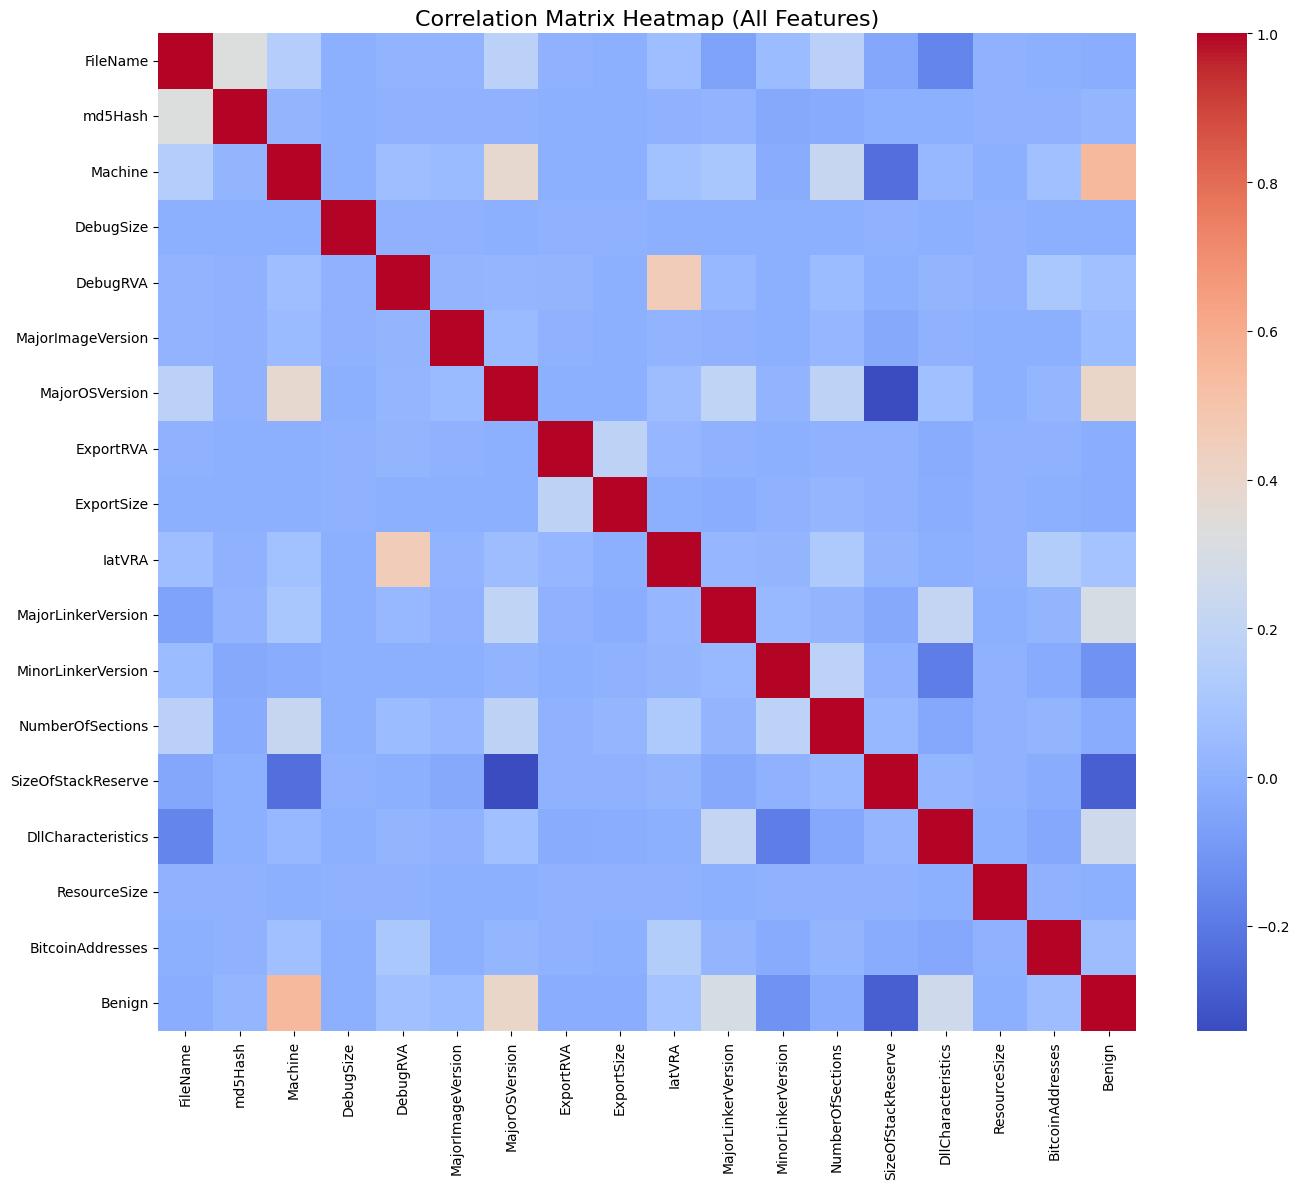

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/data_file.csv'
data = pd.read_csv(file_path)

# Copy data to preserve the original dataset
encoded_data = data.copy()

# Encode non-numeric columns
label_encoders = {}
for column in encoded_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    encoded_data[column] = label_encoders[column].fit_transform(encoded_data[column])

# Calculate the correlation matrix for the fully encoded dataset
full_correlation_matrix = encoded_data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap (All Features)", fontsize=16)
plt.tight_layout()
plt.show()


#**1.Logistic Regression**


Logistic Regression Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7125
           1       0.91      0.78      0.84      5372

    accuracy                           0.87     12497
   macro avg       0.88      0.86      0.87     12497
weighted avg       0.88      0.87      0.87     12497



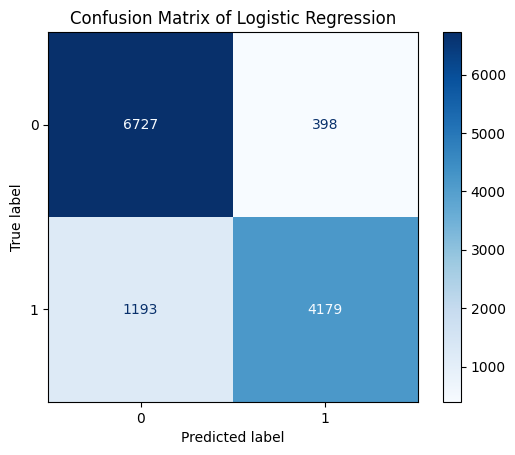

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1)  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

# Calculate the confusion matrix using the model's predictions and actual labels
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

#**2.Decision Tree**

Accuracy: 0.9947987517004081
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7125
           1       0.99      0.99      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497

Confusion Matrix:
[[7088   37]
 [  28 5344]]


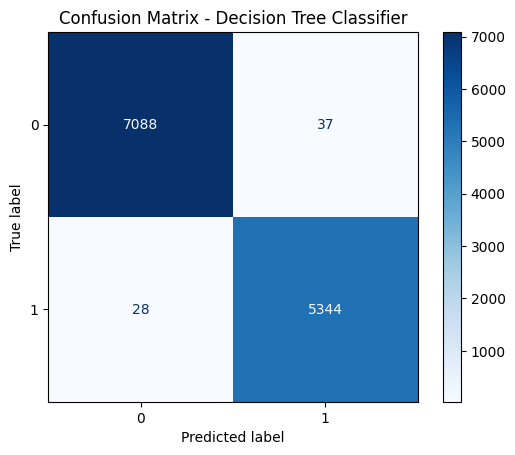

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Extract features and labels
# Dropping 'FileName' and 'md5Hash' columns which are non-numeric
X = df.drop(['Benign', 'FileName', 'md5Hash'], axis=1)
y = df['Benign']  # 'Benign' is the target label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

# Add title
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


#**3.Random Forest**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 413}
Accuracy: 99.41%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1072
           1       0.99      0.99      0.99       803

    accuracy                           0.99      1875
   macro avg       0.99      0.99      0.99      1875
weighted avg       0.99      0.99      0.99      1875



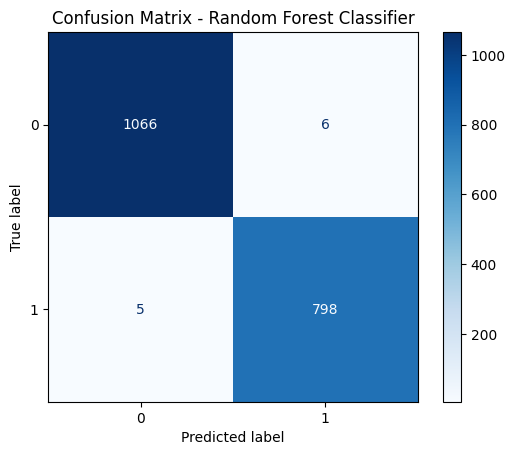

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Sample a fraction of the dataset (if large)
df_sample = df.sample(frac=0.1, random_state=42)

# Drop unnecessary columns
X = df_sample.drop(columns=['Benign', 'FileName', 'md5Hash'])
y = df_sample['Benign']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define an expanded hyperparameter grid for improved model performance
param_dist = {
    'n_estimators': randint(100, 500),  # Increased range for more trees
    'max_depth': [20, 40, 60, None],     # Larger depths to capture more complex patterns
    'min_samples_split': randint(2, 10),  # Control splits to improve generalization
    'min_samples_leaf': randint(1, 5),    # Control leaf node size
    'max_features': ['sqrt', 'log2', None]  # Experiment with feature selection
}

# Use RandomizedSearchCV with more iterations and cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Increased iterations for better exploration
    cv=5,  # Cross-validation to assess model generalization
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues')

# Add title to confusion matrix
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


#**4.Gradient Boosting (XGBoost)**


Accuracy: 99.62%
Confusion Matrix:
[[7105   20]
 [  27 5345]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      0.99      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



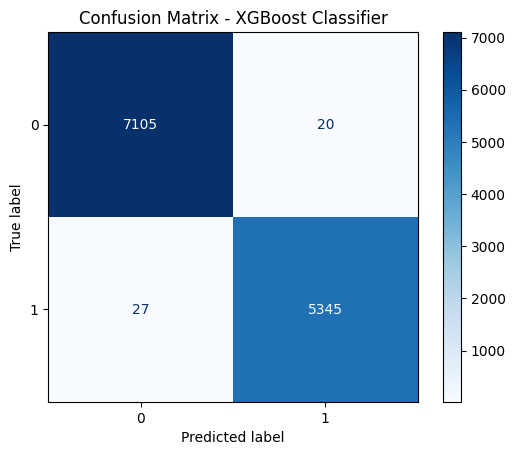

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load your data
df = pd.read_csv('/content/data_file.csv')

# Define features (X) and target (y)
X = df.drop(columns=['Benign', 'FileName', 'md5Hash'])
y = df['Benign']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Corrected line

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='mlogloss')  # Removed use_label_encoder

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')

# Add title
plt.title('Confusion Matrix - XGBoost Classifier')
plt.show()


#**5.Support Vector Machine (SVM)**


Accuracy: 85.85%
Confusion Matrix:
 [[6866  259]
 [1509 3863]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      7125
           1       0.94      0.72      0.81      5372

    accuracy                           0.86     12497
   macro avg       0.88      0.84      0.85     12497
weighted avg       0.87      0.86      0.85     12497



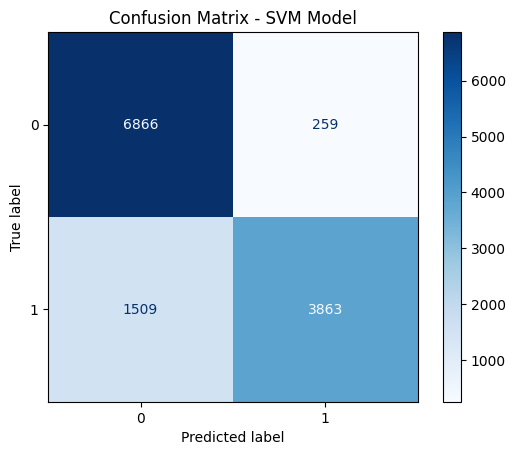

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Train and predict using SVM with the corrected scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy and evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')

# Add title
plt.title('Confusion Matrix - SVM Model')
plt.show()



##**6.NAIVE BAYES**

Naive Bayes Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.10      0.18      7125
           1       0.46      1.00      0.63      5372

    accuracy                           0.49     12497
   macro avg       0.72      0.55      0.40     12497
weighted avg       0.76      0.49      0.37     12497



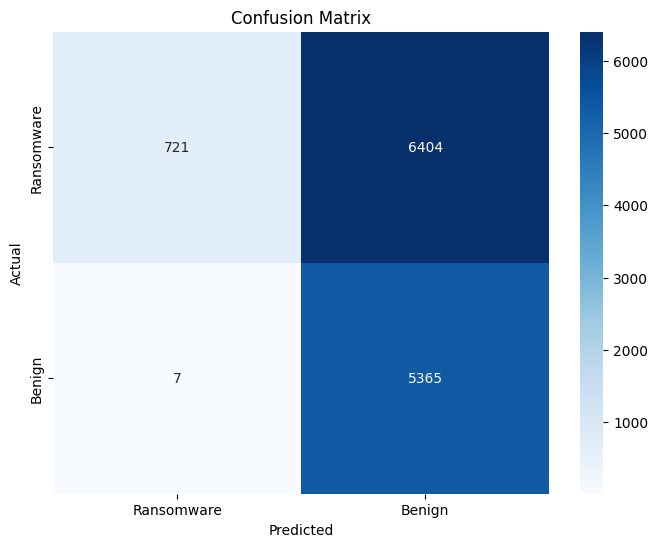

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1, errors='ignore')  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy and classification report
print(f'Naive Bayes Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ransomware', 'Benign'], yticklabels=['Ransomware', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#7.LIGHTBGM


In [ ]:
!pip install dask[dataframe]


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.4 MB/s eta 0:00:00


[LightGBM] [Info] Number of positive: 21746, number of negative: 28242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1565
[LightGBM] [Info] Number of data points in the train set: 49988, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.435024 -> initscore=-0.261380
[LightGBM] [Info] Start training from score -0.261380
LightGBM Accuracy: 99.60%
Confusion Matrix:
[[7104   21]
 [  29 5343]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      0.99      1.00      5372

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



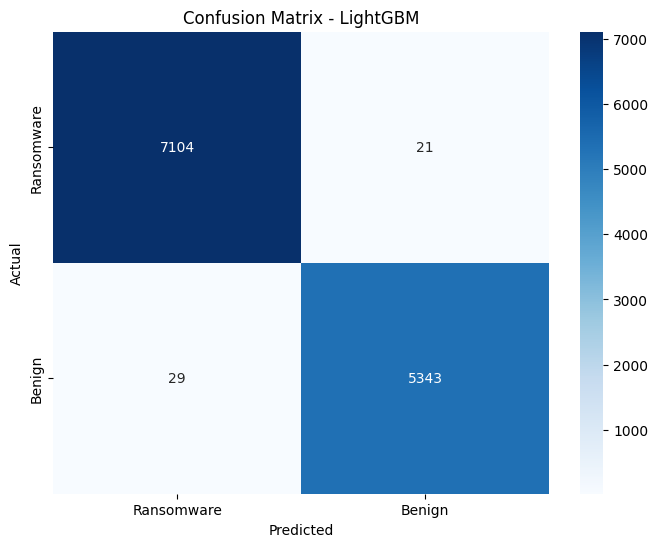

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Selecting features and target
X = df.drop(columns=['FileName', 'md5Hash', 'Benign'], errors='ignore')  # Avoid KeyError if columns are missing
y = df['Benign']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"LightGBM Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ransomware', 'Benign'], yticklabels=['Ransomware', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()


# 8.KNN

kNN Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.99      0.99      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



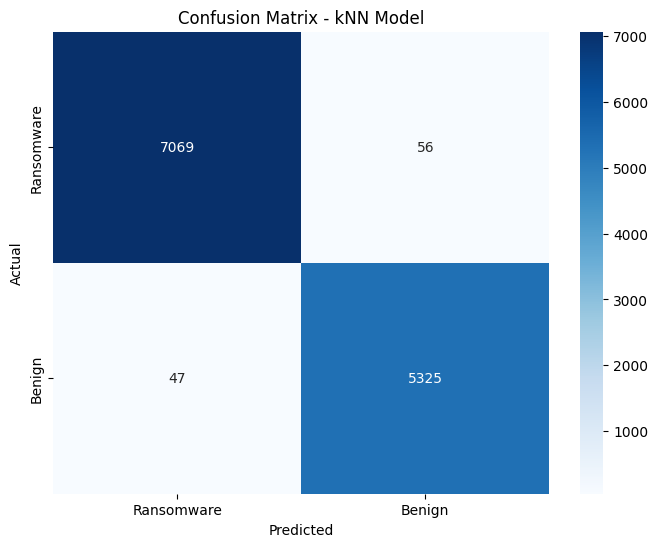

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/data_file.csv')

# Set up features and target (assuming 'Benign' is 0 for ransomware and 1 for benign files)
X = df.drop(['FileName', 'md5Hash', 'Benign'], axis=1)  # Exclude non-numeric or irrelevant columns
y = df['Benign']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbors model (kNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' to try different values
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f'kNN Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ransomware', 'Benign'], yticklabels=['Ransomware', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - kNN Model')
plt.show()


### 9.ANN

Accuracy for the model using the CSV file: 98.66%
Confusion Matrix:
[[7029   96]
 [  71 5301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.98      0.99      0.98      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



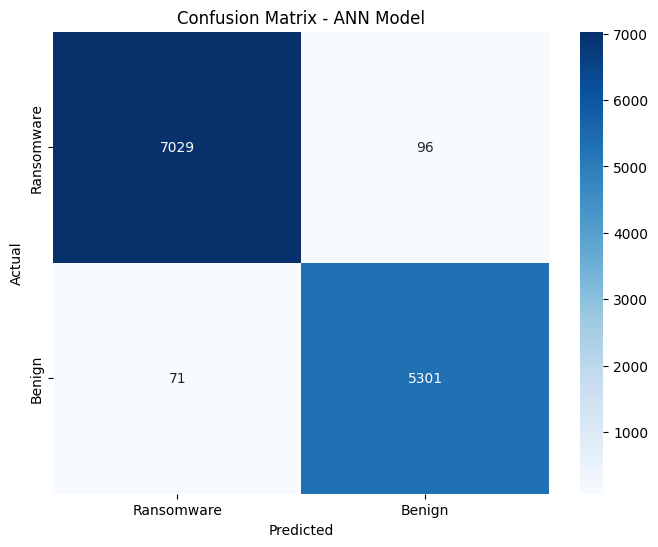

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('/content/data_file.csv')

# Split into features (X) and target (y)
X = df.drop(columns=['Benign', 'FileName', 'md5Hash']).values  # Drop non-numeric and target columns
y = df['Benign'].values  # Assuming 'Benign' is the target column with 0 (malware) and 1 (benign)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an ANN model
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
ann.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ann.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the model using the CSV file: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ransomware', 'Benign'], yticklabels=['Ransomware', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN Model')
plt.show()


## 10. Autoencoders

In [ ]:
# Install necessary libraries
!pip install tensorflow

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2825 - val_loss: 0.0193
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 12/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

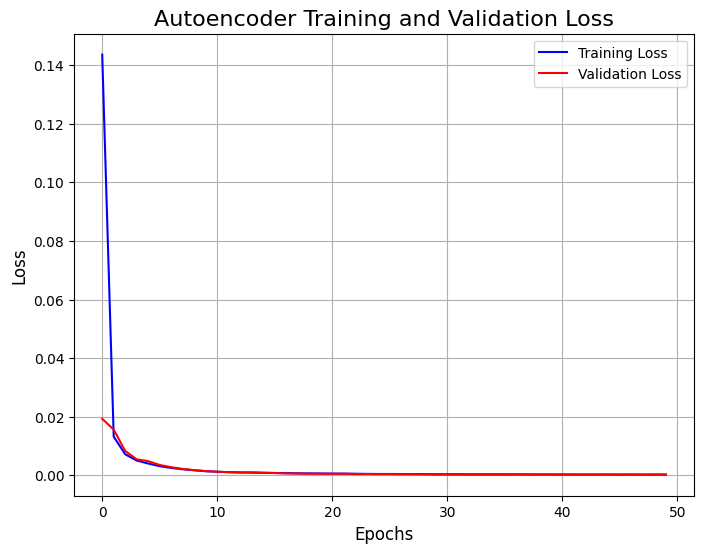

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/data_file.csv')

# Selecting only numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns.tolist()
X = data[numerical_columns]

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Normalizing the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define input dimension
input_dim = X_train_scaled.shape[1]

# Model structure
input_img = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)
decoded = Dense(input_dim)(encoded)

# Autoencoder and Encoder-Decoder Models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(16,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Autoencoder
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test_scaled, X_test_scaled),
                          callbacks=[early_stopping])

# Evaluate reconstruction loss
reconstruction_loss = autoencoder.evaluate(X_test_scaled, X_test_scaled)
print("Reconstruction Loss:", reconstruction_loss)

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Autoencoder Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## 11.Ensemble Learning (Voting Classifier)


1. Voting Classifier: A simple ensemble that combines multiple models, either using hard voting (majority class) or soft voting (average probabilities).
2. Stacking Classifier: Uses predictions from all models as input features to train a new model that learns how to best combine them.

Optimized Voting Classifier Accuracy: 1.0
Optimized Stacking Classifier Accuracy: 1.0
Efficiency Summary:
Voting Accuracy: 1.0000
Stacking Accuracy: 1.0000


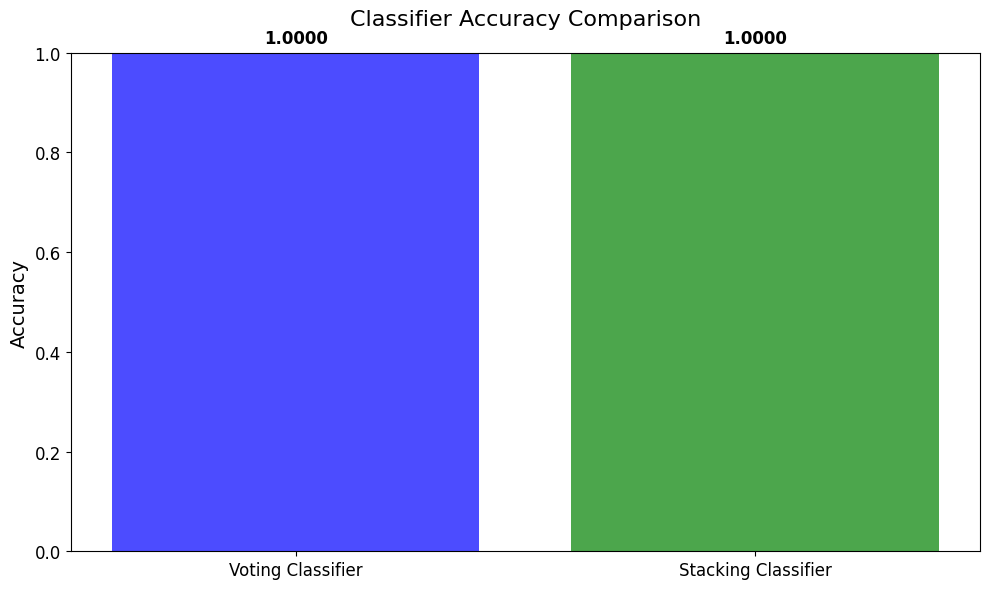

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from joblib import parallel_backend
import matplotlib.pyplot as plt

# Assuming X and y are pre-defined (features and target)
# Scale the data for improved convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Update train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define base models
log_reg = LogisticRegression(max_iter=500, C=0.5)
dec_tree = DecisionTreeClassifier(max_depth=10)
rand_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
xgboost = XGBClassifier(n_estimators=50, max_depth=10, n_jobs=-1)
light_gbm = LGBMClassifier(n_estimators=50, max_depth=10, n_jobs=-1)

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rand_forest),
    ('xgb', xgboost),
    ('lgbm', light_gbm),
    ('lr', log_reg),
    ('dt', dec_tree)
], voting='soft', weights=[2, 3, 3, 1, 1])

# Train Voting Classifier
with parallel_backend('threading'):
    voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Optimized Voting Classifier Accuracy:", voting_accuracy)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('rf', rand_forest),
    ('xgb', xgboost),
    ('lgbm', light_gbm),
    ('lr', log_reg),
    ('dt', dec_tree)
], final_estimator=LogisticRegression(max_iter=500))

# Train Stacking Classifier
with parallel_backend('threading'):
    stacking_clf.fit(X_train, y_train)

# Evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
print("Optimized Stacking Classifier Accuracy:", stacking_accuracy)

# Efficiency Summary
print(f"Efficiency Summary:\nVoting Accuracy: {voting_accuracy:.4f}\nStacking Accuracy: {stacking_accuracy:.4f}")

# Visualization of Accuracies
classifiers = ['Voting Classifier', 'Stacking Classifier']
accuracies = [voting_accuracy, stacking_accuracy]

# Adjust figure size and layout to prevent overlap
plt.figure(figsize=(10, 6))  # Increased width for better spacing
plt.bar(classifiers, accuracies, color=['blue', 'green'], alpha=0.7)

# Adjust title and labels with more space
plt.title('Classifier Accuracy Comparison', fontsize=16, pad=20)  # Increased padding for title
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', fontsize=12, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()


Compare Model **Efficiency**


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined and scaled

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'LightGBM': LGBMClassifier(),
    'KNN': KNeighborsClassifier(),
    'ANN': Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(len(np.unique(y)), activation='softmax')  # Assuming 'y' is the target variable
    ]),
    # ... (add Autoencoders and Ensemble Learning model initializations if available)
}

# Train models and get predictions
predictions = {}
for model_name, model in models.items():
    if model_name == 'ANN':
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, to_categorical(y_train), epochs=50, batch_size=256, verbose=0)
        predictions[model_name] = model.predict(X_test).argmax(axis=1)
    else:
        model.fit(X_train, y_train)
        predictions[model_name] = model.predict(X_test)

# Create results dictionary
results = {
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, predictions[model_name]) for model_name in models.keys()],
    'Precision': [precision_score(y_test, predictions[model_name]) for model_name in models.keys()],
    'Recall': [recall_score(y_test, predictions[model_name]) for model_name in models.keys()],
    'F1-score': [f1_score(y_test, predictions[model_name]) for model_name in models.keys()]
}

# Create and display the DataFrame
df_results = pd.DataFrame(results)

# Sort the DataFrame by Accuracy in descending order
df_results_sorted = df_results.sort_values(by='Accuracy', ascending=False)

print(df_results_sorted)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:31:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 18982, number of negative: 24757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1562
[LightGBM] [Info] Number of data points in the train set: 43739, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433983 -> initscore=-0.265617
[LightGBM] [Info] Start training from score -0.265617
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
                 Model  Accuracy  Precision    Recall  F1-score
2        Random Forest  0.996479   0.996921  0.994961  0.995940
3              XGBoost  0.996213   0.996063  0.995206  0.995635
6             LightGBM  0.995999   0.996550  0.994223  0.995385
1        Decision Tree  0.994666   0.993976  0.993732  0.993854
7                  KNN  0.991412   0.990769  0.989430  0.990099
8                

<ipython-input-44-54570d73e2b2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df_results_sorted, palette='viridis')


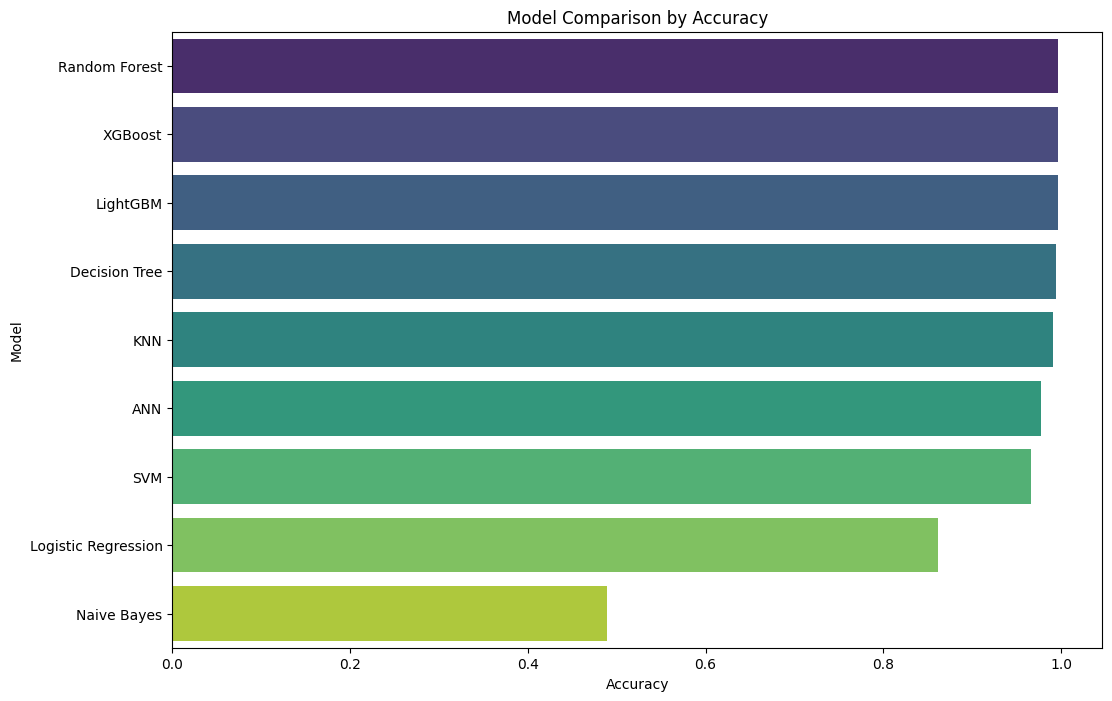

<ipython-input-44-54570d73e2b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=df_results_sorted, palette='plasma')


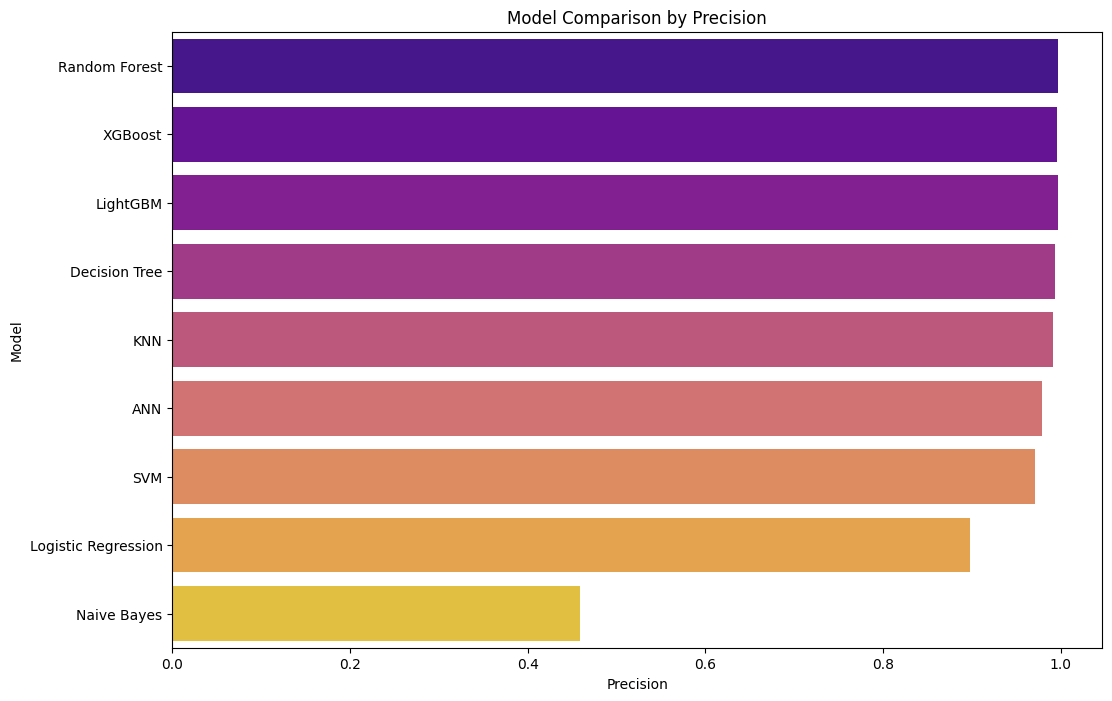

<ipython-input-44-54570d73e2b2>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=df_results_sorted, palette='cividis')


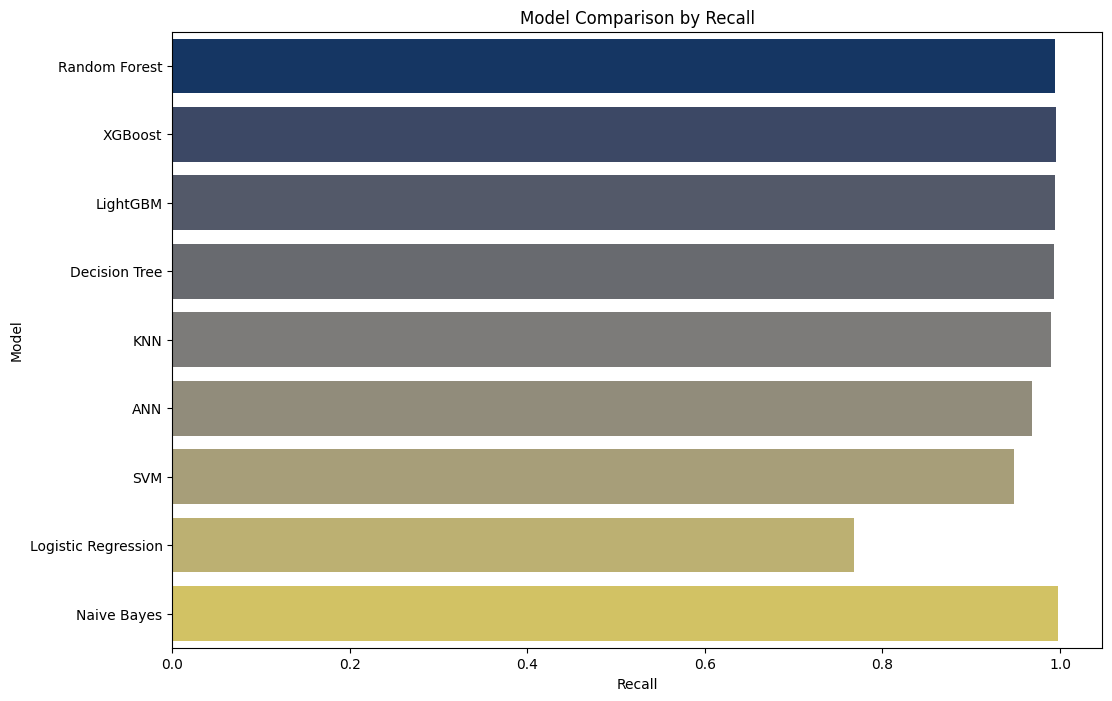

<ipython-input-44-54570d73e2b2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1-score', y='Model', data=df_results_sorted, palette='magma')


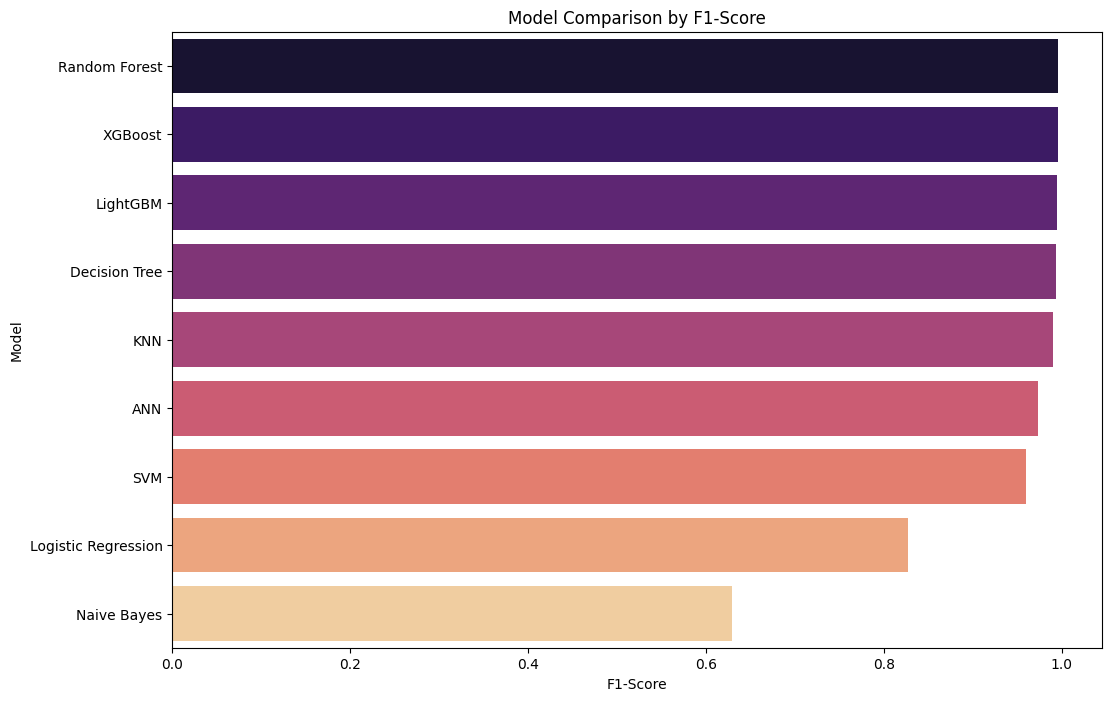

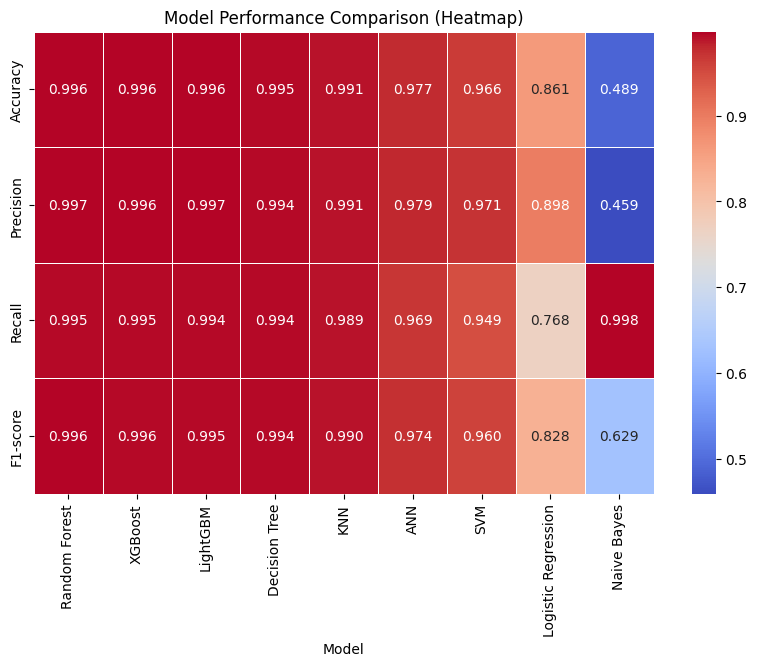

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_results_sorted is already created as in the previous code

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot comparison of models by accuracy
sns.barplot(x='Accuracy', y='Model', data=df_results_sorted, palette='viridis')
plt.title('Model Comparison by Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# Plot comparison of models by Precision
plt.figure(figsize=(12, 8))
sns.barplot(x='Precision', y='Model', data=df_results_sorted, palette='plasma')
plt.title('Model Comparison by Precision')
plt.xlabel('Precision')
plt.ylabel('Model')
plt.show()

# Plot comparison of models by Recall
plt.figure(figsize=(12, 8))
sns.barplot(x='Recall', y='Model', data=df_results_sorted, palette='cividis')
plt.title('Model Comparison by Recall')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()

# Plot comparison of models by F1-Score
plt.figure(figsize=(12, 8))
sns.barplot(x='F1-score', y='Model', data=df_results_sorted, palette='magma')
plt.title('Model Comparison by F1-Score')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.show()

# Optionally, plot a heatmap to compare all metrics
heatmap_data = df_results_sorted[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']].set_index('Model')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Model Performance Comparison (Heatmap)')
plt.show()
